# PCA & Clustering Assignment:

### Problem Statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

### Objective

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT.  The following approach is suggested :

 

- Perform PCA on the dataset and obtain the new dataset with the Principal Components. Choose the appropriate number of components k. You need to perform your clustering activity on this new dataset, i.e. the PCA modified dataset with the k components.

- Outlier Analysis: You must perform the Outlier Analysis on the dataset, before or after performing PCA, as per your choice. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.

- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]

- Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries. Note that you perform clustering on the PCA modified dataset and the clusters that are formed are being analysed now using the original variables to identify the countries which you finally want to select.

- Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters. You should also do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc. 

- The final list of countries depends on the number of components that you choose and the number of clusters that you finally form. Also, both K-means and Hierarchical may give different results. Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

In [303]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [633]:
#Let's read the dataset first
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [634]:
df.shape

(167, 10)

In [635]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [636]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [637]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [638]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df[[ 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [639]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### As we can see there are no null values in the database

In [640]:
# Converting the %age values to actual values

df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [641]:
# Splitting the database in a way where Y contains all the country names and the rest of numerical values are in X

X = df.drop('country', 1)
y = df['country']

In [642]:
## First let us see if we can explain the dataset using fewer variables

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X1 = standard_scaler.fit_transform(X)

In [643]:
X1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [644]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [645]:
#Performing the PCA

pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [646]:
#List of PCA components.

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [647]:
#Let's check the variance ratios

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

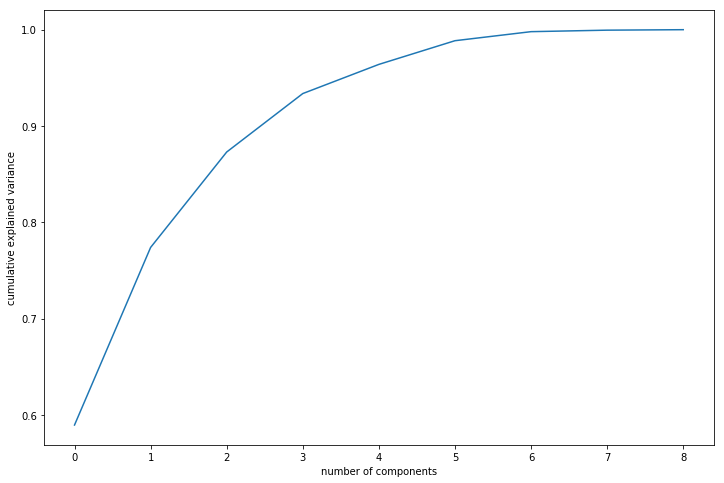

In [648]:
#Plotting the scree plot

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [649]:
### Max Variance of around 95% can be explained with a total of 4 Principal Components but in this case and for visualization
### we will be considering only 2 Principal Components

In [650]:
#Understanding how the original 2 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(X.columns)
#pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df

,Feature,PC1,PC2
0,child_mort,-0.316392,0.476267
1,exports,0.342887,0.397311
2,health,0.358535,0.155053
3,imports,0.344865,0.370781
4,income,0.380041,0.128384
5,inflation,-0.143085,0.221261
6,life_expec,0.343857,-0.369820
7,total_fer,-0.302842,0.459715
8,gdpp,0.399988,0.200624


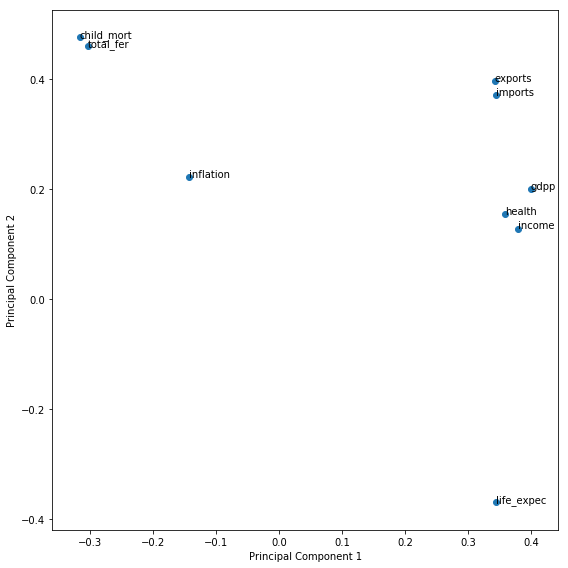

In [651]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [652]:
#Finally let's go ahead and do dimenstionality reduction using the 4 Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=2)

In [653]:
df_pca = pca_final.fit_transform(X1)
df_pca.shape

(167, 2)

In [654]:
df_pca

array([[-2.63781321e+00,  1.48536461e+00],
       [-2.28210939e-02, -1.42971156e+00],
       [-4.56234772e-01, -7.07360261e-01],
       [-2.72276377e+00,  2.15229306e+00],
       [ 6.49117451e-01, -1.01774207e+00],
       [ 3.94157308e-02, -7.30261748e-01],
       [-3.32874986e-01, -1.27774541e+00],
       [ 3.18004346e+00, -2.42945480e-01],
       [ 3.81521984e+00,  2.70503210e-01],
       [-4.66682132e-01, -5.12070612e-01],
       [ 1.49764135e+00, -4.07261928e-01],
       [ 1.47173856e+00, -3.48835344e-01],
       [-1.01470326e+00, -7.04204726e-01],
       [ 8.44156324e-01, -9.92326449e-01],
       [-1.23125395e-02, -1.01063660e+00],
       [ 3.96056409e+00,  8.51654535e-01],
       [-4.03848235e-01, -9.05487852e-01],
       [-2.36763892e+00,  1.20900783e+00],
       [-7.15518871e-01, -7.61656090e-01],
       [-1.01785700e+00, -4.27509939e-01],
       [ 2.51782613e-01, -1.68612275e+00],
       [-1.13121768e+00,  4.07034302e-01],
       [ 1.66361284e-01, -1.02506573e+00],
       [ 2.

In [655]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [656]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})

In [657]:
pcs_df2.head()

,PC1,PC2
0,-2.637813,1.485365
1,-0.022821,-1.429712
2,-0.456235,-0.707360
3,-2.722764,2.152293
4,0.649117,-1.017742


### Let's perform Outlier Analysis
Let's do the outlier analysis before proceeding to clustering<br>
I have just done the outlier analysis but haven't removed any outlier from the actual dataset for analysis. 

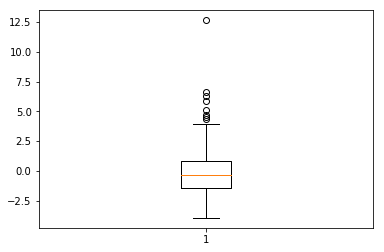

In [658]:
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df3 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

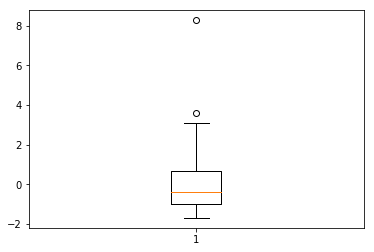

In [659]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df3 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

In [660]:
pcs_df2.shape

(167, 2)

In [661]:
pcs_df3.shape   ##### After outlier analysis, 18 countries would have been deleted so for now removing these countries is not feasible

(149, 2)

In [662]:
#### If we remove the outliers some very important data may be lost so not removing the outliers in the present case will work fine.

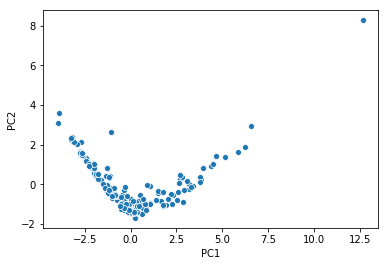

In [663]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

In [664]:
#Some distinct clusters are already visible to us.
#Let's go ahead and begin with the clustering process

In [665]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [666]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.9700407109545464

#### The hopkins score greater than 0.5 for the given dataset, meaning the dataset has a good tendency to form clusters

### K Means Clustering

In [667]:
data3_1 = pcs_df2

In [668]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data3_1)
    sse_.append([k, silhouette_score(data3_1, kmeans.labels_)])

In [669]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5430389163150117
For n_clusters=3, the silhouette score is 0.5556257893217506
For n_clusters=4, the silhouette score is 0.5634090433888116
For n_clusters=5, the silhouette score is 0.5561979167211277
For n_clusters=6, the silhouette score is 0.4997499239383595
For n_clusters=7, the silhouette score is 0.45425856506924234
For n_clusters=8, the silhouette score is 0.47038296195896906


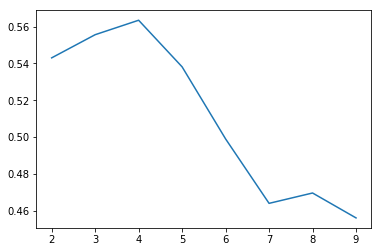

In [670]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

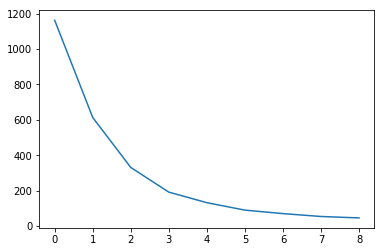

In [671]:
## From the above analysis we find that 3 and 4 both seem to be good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(data3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [672]:
### Here we can see that the last significant bend occurs at k = 3 so choosing 3 as the number of clusters would work.

model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(data3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [673]:
data4=pcs_df2
data4.index = pd.RangeIndex(len(data4.index))
data_km = pd.concat([data4, pd.Series(model_clus2.labels_)], axis=1)
data_km.columns = ['PC1', 'PC2','ClusterID']
data_km.head()

,PC1,PC2,ClusterID
0,-2.637813,1.485365,1
1,-0.022821,-1.429712,2
2,-0.456235,-0.707360,2
3,-2.722764,2.152293,1
4,0.649117,-1.017742,2


In [674]:
data_km['ClusterID'].value_counts()

2    92
1    48
0    27
Name: ClusterID, dtype: int64

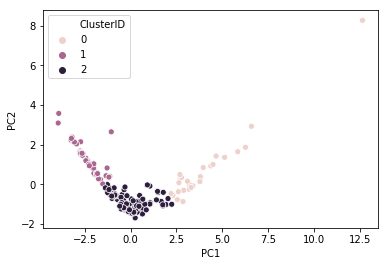

In [675]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_km)

In [676]:
# Merging of Original Dataset with Cluster ID and Principal Components 
data5=pd.merge(df,data_km, left_index=True,right_index=True)
data5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637813,1.485365,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.022821,-1.429712,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.456235,-0.707360,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722764,2.152293,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649117,-1.017742,2


In [677]:
data6=data5.drop(['PC1','PC2'],axis=1)
data6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [706]:
data6[150:165]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
150,Togo,90.3,196.176,37.3320,279.624,1210,1.18,58.7,4.87,488,1,0
151,Tonga,17.4,440.200,179.9850,2140.650,4980,3.68,69.9,3.91,3550,2,0
152,Tunisia,17.4,2090.700,257.0940,2289.420,10400,3.82,76.9,2.14,4140,2,0
153,Turkey,19.1,2182.800,721.1800,2728.500,18000,7.01,78.2,2.15,10700,2,0
154,Turkmenistan,62.0,3387.720,111.0000,1975.800,9940,2.31,67.9,2.83,4440,2,0
155,Uganda,81.0,101.745,53.6095,170.170,1540,10.60,56.8,6.15,595,1,0
156,Ukraine,11.7,1398.870,229.2840,1517.670,7820,13.40,70.4,1.44,2970,2,0
157,United Arab Emirates,8.6,27195.000,1281.0000,22260.000,57600,12.50,76.5,1.87,35000,0,1
158,United Kingdom,5.2,10969.800,3749.9600,11981.200,36200,1.57,80.3,1.92,38900,0,1
159,United States,7.3,6001.600,8663.6000,7647.200,49400,1.22,78.7,1.93,48400,0,1


In [679]:
#Clustering is completed and now we will use the median value of components to complete the objective of the project

In [680]:
clu_child_mort = pd.DataFrame(data6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = pd.DataFrame(data6.groupby(["ClusterID"]).exports.mean())
clu_health = pd.DataFrame(data6.groupby(["ClusterID"]).health.mean())
clu_imports = pd.DataFrame(data6.groupby(["ClusterID"]).imports.mean())
clu_income = pd.DataFrame(data6.groupby(["ClusterID"]).income.mean())
clu_inflation = pd.DataFrame(data6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = pd.DataFrame(data6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = pd.DataFrame(data6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = pd.DataFrame(data6.groupby(["ClusterID"]).gdpp.mean())

In [681]:
df9 = pd.concat([pd.Series([0,1]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [682]:
df9.head()

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,,
0,0.0,5.092593,31897.859259,4378.955185,26469.600000,50833.333333,3.120407,80.462963,1.775185,48759.259259
1,1.0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,NaN,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565


In [683]:
df9.columns = ['ClusterID','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df9

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,,
0,0.0,5.092593,31897.859259,4378.955185,26469.600000,50833.333333,3.120407,80.462963,1.775185,48759.259259
1,1.0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,NaN,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565


In [684]:
df10 = df9.drop('ClusterID', axis=1)

In [685]:
df10

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,5.092593,31897.859259,4378.955185,26469.600000,50833.333333,3.120407,80.462963,1.775185,48759.259259
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565


In [686]:
#Let's use the concept of binning to find the countries that have the direst need for aid.
fin=df[df['income']<=3897.354167]
fin=fin[fin['gdpp']<= 1909.208333]
fin=fin[fin['child_mort']> 5.092593]

fin.nsmallest(10,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


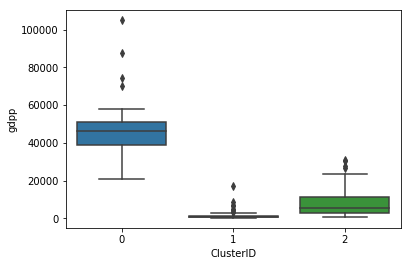

In [708]:
# plots
sns.boxplot(x='ClusterID', y='gdpp', data=data6)

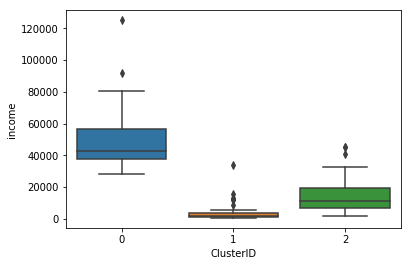

In [709]:
# plots
sns.boxplot(x='ClusterID', y='income', data=data6)

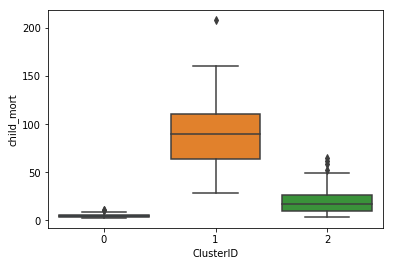

In [711]:
# plots
sns.boxplot(x='ClusterID', y='child_mort', data=data6)

##### From the above K Means Clustering analysis we can see that the countries with direst need of are:

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic

### Hierarchical Clustering

In [687]:
X2 = pd.DataFrame(X1)

In [688]:
X2.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [689]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [690]:
X2.columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

In [691]:
X2['ClusterID'] = data6['ClusterID']

In [692]:
X2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,2
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2


### Single Linkage

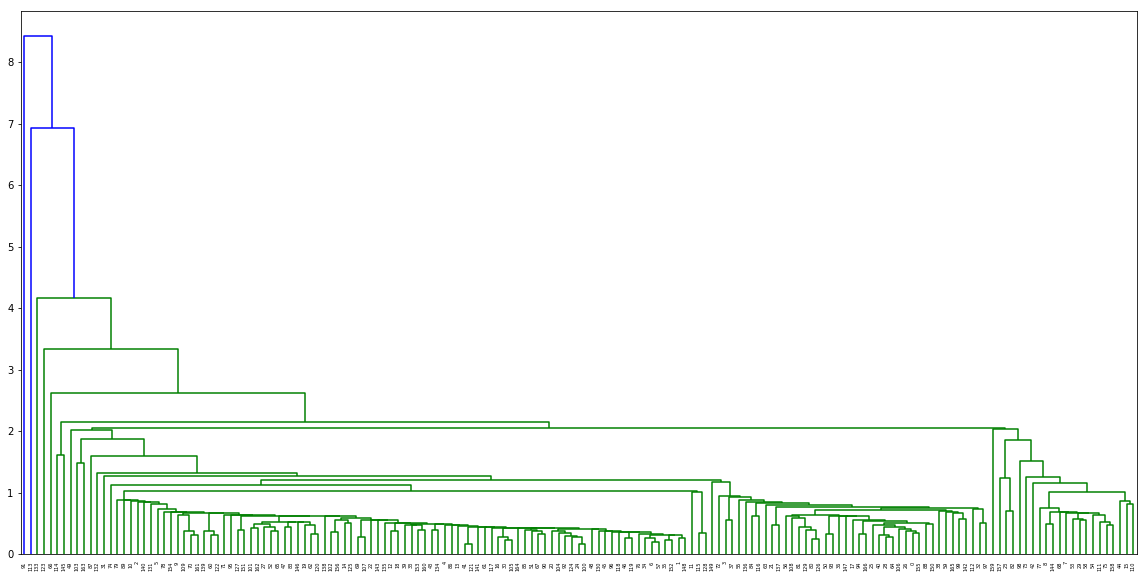

In [693]:
plt.figure(figsize=(20,10))
mergings = linkage(X2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage

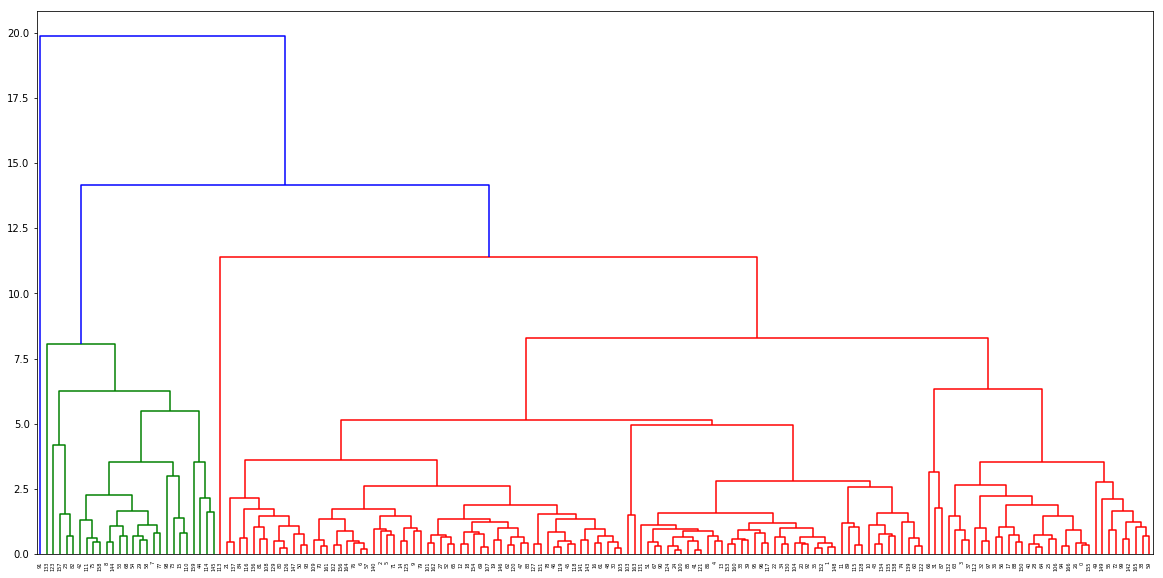

In [694]:
plt.figure(figsize=(20,10))
mergings = linkage(X2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [695]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [696]:
# Assigning cluster labels
data6['cluster_labels'] = cluster_labels
data6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0


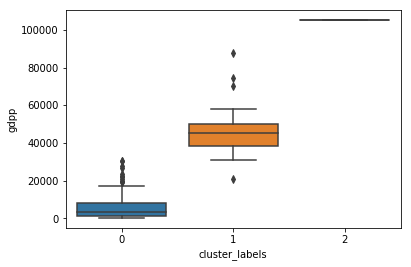

In [697]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=data6)

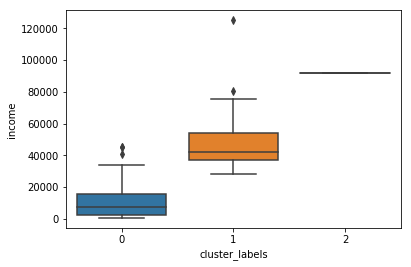

In [698]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=data6)

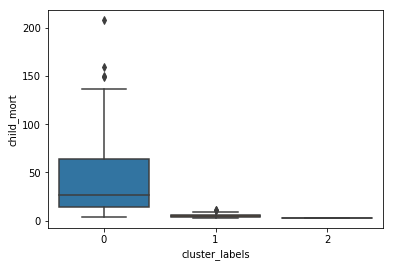

In [699]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=data6)

In [700]:
clu_child_mort = pd.DataFrame(data6.groupby(["cluster_labels"]).child_mort.mean())
clu_exports = pd.DataFrame(data6.groupby(["cluster_labels"]).exports.mean())
clu_health = pd.DataFrame(data6.groupby(["cluster_labels"]).health.mean())
clu_imports = pd.DataFrame(data6.groupby(["cluster_labels"]).imports.mean())
clu_income = pd.DataFrame(data6.groupby(["cluster_labels"]).income.mean())
clu_inflation = pd.DataFrame(data6.groupby(["cluster_labels"]).inflation.mean())
clu_life_expec = pd.DataFrame(data6.groupby(["cluster_labels"]).life_expec.mean())
clu_total_fer = pd.DataFrame(data6.groupby(["cluster_labels"]).total_fer.mean())
clu_gdpp = pd.DataFrame(data6.groupby(["cluster_labels"]).gdpp.mean())

In [701]:
df11 = pd.concat([pd.Series([0,1]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [702]:
df11.head()

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels,,,,,,,,,,
0,0.0,44.668571,2700.008197,416.018965,2754.111444,10647.592857,8.680821,68.645000,3.174143,6060.814286
1,1.0,5.180769,26057.392308,4233.588077,21753.046154,49261.538462,3.101192,80.430769,1.780769,46596.153846
2,NaN,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000


In [703]:
df11.columns = ['cluster_labels','child_mort',    'exports',     'health',    'imports',
           'income',  'inflation', 'life_expec',  'total_fer',       'gdpp']
df11

,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels,,,,,,,,,,
0,0.0,44.668571,2700.008197,416.018965,2754.111444,10647.592857,8.680821,68.645000,3.174143,6060.814286
1,1.0,5.180769,26057.392308,4233.588077,21753.046154,49261.538462,3.101192,80.430769,1.780769,46596.153846
2,NaN,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000


In [704]:
df12 = df11.drop('cluster_labels',axis=1)

In [705]:
#Let's use the concept of binning
fin=df[df['income']<=10647.592857]
fin=fin[fin['gdpp']<= 6060.814286]
fin=fin[fin['child_mort']>2.800000]

fin.nsmallest(10,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


##### From the above Hierarchical Clustering Analysis we can see that the countries with direst need of aid are:

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic